In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

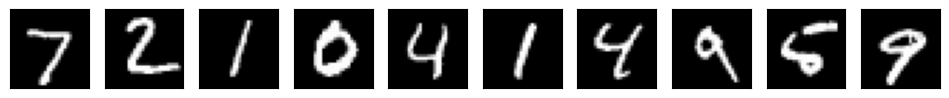

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(12, 12))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

![image.png](attachment:image.png)

In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape

In [16]:
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2),  padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation = 'relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

## THIRD SET OF LAYERS
# CONVOLUTIONAL LAYER
#encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
#encode_model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
encode_model.add(Flatten(input_shape=[7,7,8]))
encode_model.add(Dense(7*7*8, activation="relu"))
encode_model.add(Dense(30, activation="relu"))

In [17]:
############
# Decoding #
############
decode_model=Sequential()

# DeConv1
#decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
#decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Dense(7*7*8,activation="relu"))
decode_model.add(Reshape([7,7,8]))

# DeConv2
decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv3
decode_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))


In [18]:
autoencoder = Sequential([encode_model, decode_model])

In [21]:
encode_model.compile(optimizer='adam', loss='binary')

In [33]:
# Summarize the autoencoder model
autoencoder.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 30)                167166    
                                                                 
 sequential_8 (Sequential)   (None, 28, 28, 1)         14049     
                                                                 
Total params: 181215 (707.87 KB)
Trainable params: 181215 (707.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
encode_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_3 (Dense)             (None, 392)              

In [37]:
decode_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 392)               12152     
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 8)           0         
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 up_sampling2d_3 (UpSamplin  (None, 28, 28, 16)        0         
 g2D)                                                 

In [39]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255
x_train.shape

(60000, 28, 28, 1)

In [40]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [43]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
# Train the model
autoencoder.fit(x_train, x_train,  epochs=10, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/10


469/469 [==============================] - 9s 17ms/step - loss: 0.0534 - accuracy: 0.8073 - val_loss: 0.9999 - val_accuracy: 0.8072
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0040 - accuracy: 0.8088 - val_loss: 0.9272 - val_accuracy: 0.8072
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0040 - accuracy: 0.8088 - val_loss: 0.8629 - val_accuracy: 0.8072
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0040 - accuracy: 0.8088 - val_loss: 0.8034 - val_accuracy: 0.8072
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0040 - accuracy: 0.8088 - val_loss: 0.7637 - val_accuracy: 0.8072
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0040 - accuracy: 0.8088 - val_loss: 0.7230 - val_accuracy: 0.8072
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0040 - accuracy: 0.8088 - val_loss: 0.6985 - val_accuracy: 0.80

313/313 [==============================] - 1s 3ms/step


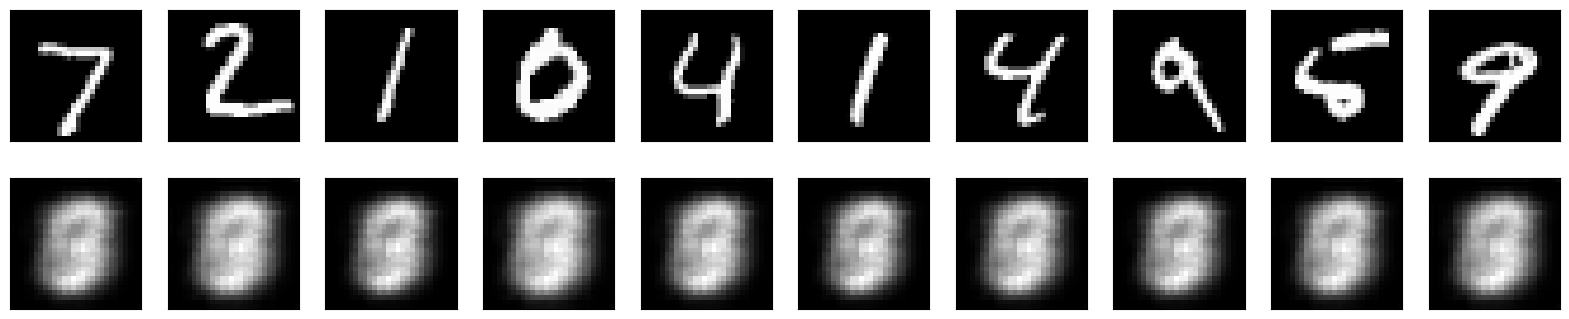

In [48]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


In [50]:
autoencoder.fit(x_train, x_train,  epochs=5, batch_size=32, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0040 - accuracy: 0.8088 - val_loss: 0.6121 - val_accuracy: 0.8072
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0039 - accuracy: 0.8088 - val_loss: 0.6112 - val_accuracy: 0.8072
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0038 - accuracy: 0.8088 - val_loss: 0.7087 - val_accuracy: 0.8072
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0037 - accuracy: 0.8088 - val_loss: 0.7304 - val_accuracy: 0.8072
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0037 - accuracy: 0.8088 - val_loss: 0.7733 - val_accuracy: 0.8072


313/313 [==============================] - 1s 2ms/step


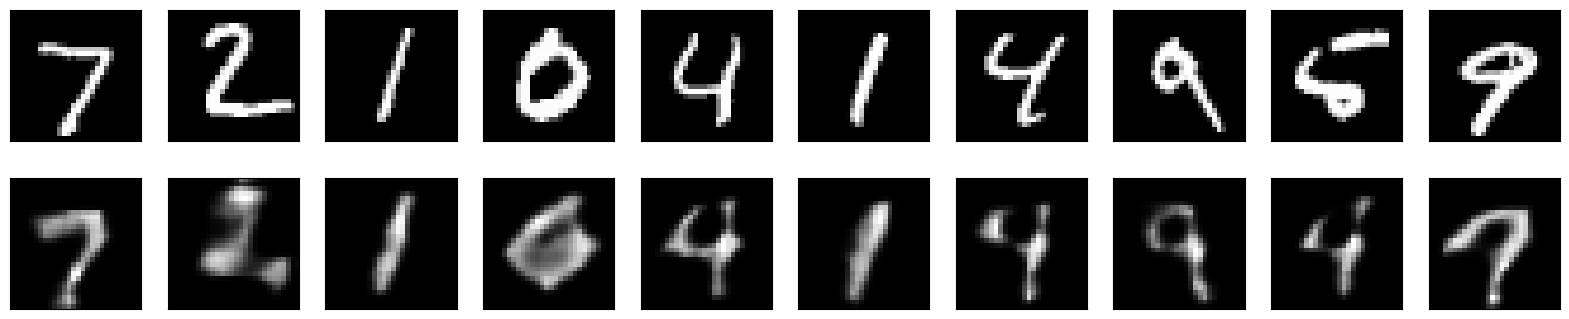

In [68]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(edgecolor='pink',figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


In [52]:
autoencoder.fit(x_train, x_train,  epochs=3, batch_size=64, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/3
938/938 [==============================] - 10s 10ms/step - loss: 0.0036 - accuracy: 0.8088 - val_loss: 0.7880 - val_accuracy: 0.8072
Epoch 2/3
938/938 [==============================] - 10s 11ms/step - loss: 0.0036 - accuracy: 0.8088 - val_loss: 0.8108 - val_accuracy: 0.8072
Epoch 3/3
938/938 [==============================] - 10s 11ms/step - loss: 0.0036 - accuracy: 0.8088 - val_loss: 0.8282 - val_accuracy: 0.8072


313/313 [==============================] - 1s 2ms/step


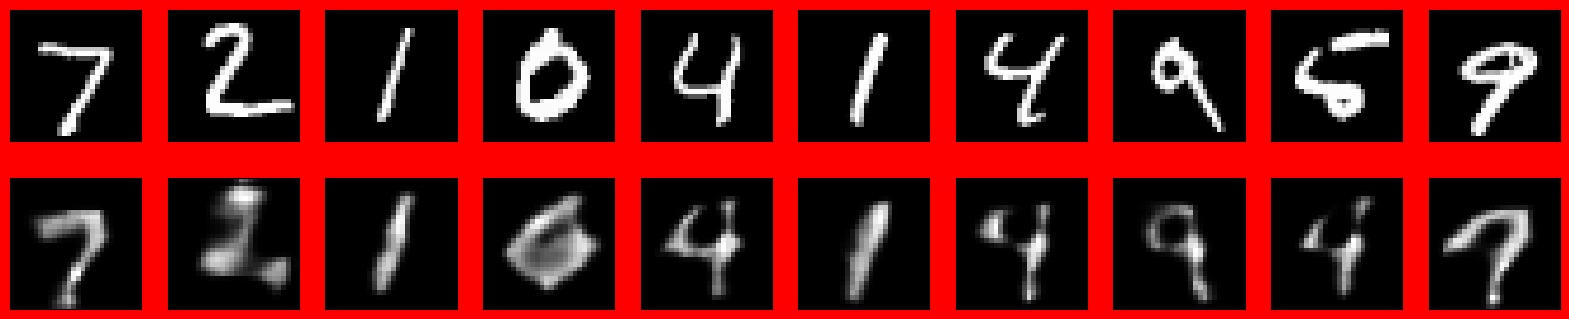

In [64]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(facecolor='Red',figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [69]:
autoencoder.fit(x_train, x_train,  epochs=3, batch_size=64, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/3
938/938 [==============================] - 10s 10ms/step - loss: 0.0036 - accuracy: 0.8088 - val_loss: 0.8394 - val_accuracy: 0.8072
Epoch 2/3
938/938 [==============================] - 9s 10ms/step - loss: 0.0036 - accuracy: 0.8088 - val_loss: 0.8606 - val_accuracy: 0.8072
Epoch 3/3
938/938 [==============================] - 10s 10ms/step - loss: 0.0036 - accuracy: 0.8088 - val_loss: 0.8687 - val_accuracy: 0.8072


313/313 [==============================] - 1s 2ms/step


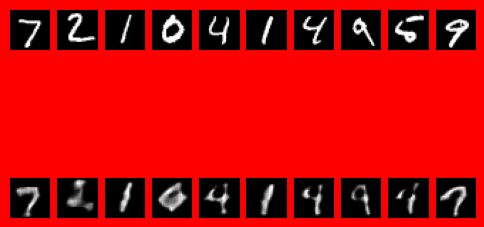

In [79]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(num=10,clear=False,frameon=True,facecolor='Red',figsize=(6, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [59]:
plt.figure?